In [1]:
# after implementing new envelope misfit function,
# would like to check gradient consistency
# the testdata/testsrc setup could be used for that.

In [2]:
# what we need for preparation:
# - compute the gradient for the input source
# - have a vector of smaller and smaller steps
# - have a random update to the model
# - compute m0

# what we do then for each step in the step vector:
# - scale the random update by this step
# - compute the model of the input plus the update
# - get the misfit of that model output
# - get the relative error between this misfit and m0
# - record (step,relative error)

In [2]:
import os
import numpy as np
from obspy import read
from pandas import read_csv
import h5py
import matplotlib.pyplot as plt
mtype = 'square_envelope'

In [4]:
# compute the gradient for the input model
os.system('cp -R ../test/testdata/testsrc/wavefield_processed_archived/ \
          ../test/testdata/testsrc/wavefield_processed')
os.system('cp ../test/testdata/testsrc/step_0/starting_model_basis_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
os.system('cp ../test/testdata/testsrc/step_0/starting_model_basis_archived.h5 \
          ../test/testdata/testsrc/step_0/base_model.h5')
os.mkdir('../test/testdata/testsrc/step_0/corr')
os.mkdir('../test/testdata/testsrc/step_0/adjt')
os.mkdir('../test/testdata/testsrc/step_0/kern')
os.mkdir('../test/testdata/testsrc/step_0/grad')
os.system('cp inputs/measr_config.json ../test/testdata/testsrc/')
os.system('cp inputs/source_config.json ../test/testdata/testsrc/')
os.system('cp inputs/config.json ../test/testdata/')

0

In [5]:
os.system('noisi correlation ../test/testdata/testsrc 0')
### remove output after finishing

0

In [7]:
os.system('noisi measurement ../test/testdata/testsrc 0')
m0 = read_csv('../test/testdata/testsrc/step_0/'+mtype+'.0.measurement.csv')['l2_norm'][0]
print(m0)

1296.22498076


In [8]:
os.system('noisi kernel ../test/testdata/testsrc 0')

0

In [9]:
#os.system('noisi gradient ../test/testdata/testsrc 0')

In [17]:
eps = np.arange(-4,2,1.0)

In [13]:
grad = np.load('../test/testdata/testsrc/step_0/grad/grad_all.npy')
grad = grad[0,:,:]
print(grad.shape)

(2025, 1800)


In [14]:
#direction = np.zeros(grad.shape)
#direction[:,0] = (np.random.random(grad[:,0].shape)-0.5)#(np.random.random((grad[:,0].shape))-0.5)
direction = (np.random.random(grad.shape)-0.5)#(np.random.random((grad[:,0].shape))-0.5)


In [15]:
#from noisi import BasisFunction
#b = BasisFunction('sine_taper',3601,3601)
# grad_expanded = np.zeros(grad.shape)
# direction_expanded = np.zeros(direction.shape)
# for i in range(2025):
#     grad_expanded[i,:] = b.expand(grad[i,:])
#     direction_expanded[i,:] = b.expand(direction[i,:])

# m_grad = np.sum(grad_expanded*direction_expanded)
m_grad = np.sum(direction*grad)
print(m_grad)

-13.9131816815


In [16]:

def get_misfit_from_direction(dvec):
    os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
    
    os.system('cp ../test/testdata/testsrc/step_0/starting_model_basis_archived.h5 \
          ../test/testdata/testsrc/step_0/starting_model.h5')
    f = h5py.File('../test/testdata/testsrc/step_0/starting_model.h5','a')
    
    f['model'][:] += dvec
    f.close()

    
    os.system('rm ../test/testdata/testsrc/step_0/corr/\
NET.STA1..CHA--NET.STA2..CHA.sac')
    
    os.system('rm ../test/testdata/testsrc/step_0/'+
              mtype+'.0.measurement.csv')
    
    os.system('noisi correlation ../test/testdata/testsrc 0')
    

    os.system('noisi measurement ../test/testdata/testsrc 0')
    msr = read_csv('../test/testdata/testsrc/step_0/'+
                   mtype+'.0.measurement.csv')
    msr = msr['l2_norm'][0]
    
    return(msr)
    
    
    

-4.0
-15.3239638007
0.101398957589
-3.0
-14.0770782004
0.0117799452875
-2.0
-13.8895245702
0.00170033797875
-1.0
-13.9143539647
8.42570200207e-05
0.0
-13.9136610478
3.44541130502e-05
1.0
-13.9644074353
0.00368181448526


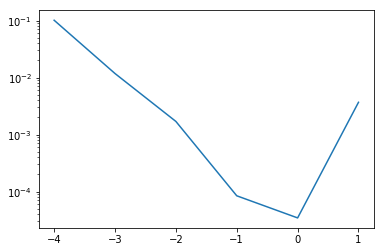

In [18]:
results = np.zeros(len(eps))
mf_a = np.zeros(len(eps))
plt.figure
for i in range(len(eps)):
    print(eps[i])
    val = 10**eps[i]
    msr1 = get_misfit_from_direction(val*direction)
    msr2 = get_misfit_from_direction(-val*direction)
    mf_approx = 1./(2.*val)*(msr1-msr2)
    print(mf_approx)
    results[i] = np.abs(m_grad-mf_approx)/np.abs(m_grad)
    mf_a[i] = mf_approx
    print(results[i])


plt.semilogy(eps,results)
plt.show()

In [19]:
# removing copied files...
os.system('rm -rf ../test/testdata/testsrc/wavefield_processed')
os.system('rm ../test/testdata/testsrc/step_0/starting_model.h5')
os.system('rm -rf ../test/testdata/testsrc/step_0/corr')
os.system('rm -rf ../test/testdata/testsrc/step_0/adjt')
os.system('rm -rf ../test/testdata/testsrc/step_0/kern')
os.system('rm -rf ../test/testdata/testsrc/step_0/grad')
os.system('rm ../test/testdata/testsrc/measr_config.json')
os.system('rm ../test/testdata/testsrc/source_config.json')
os.system('rm ../test/testdata/config.json')

0

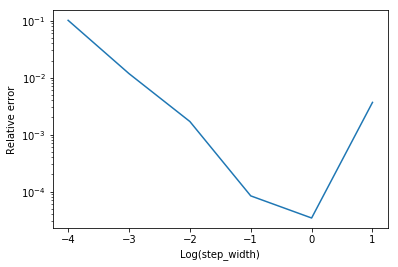

In [20]:
plt.semilogy(eps,results)
plt.xlabel('Log(step_width)')
plt.ylabel('Relative error')
plt.show()

In [26]:
23805.4/3.306



7200.6654567453115